In [131]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

pp File: ../InputData/pT_Rebin_1_pDevNONE/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/pT_Rebin_1_pDevNONE/pPb_SE_L0_Correlation_GMB_Ratio.root


In [132]:
print(N_dPhi_Bins)
print(dPhi_Bins)
for dphi in dPhi_Bins:
    print("%1.4f"%(dphi)),
print("")
print(len(delta_phi_centers))
print(delta_phi_centers)

8
[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793]
0.0000 0.3927 0.7854 1.1781 1.5708 1.9635 2.3562 2.7489 3.1416 
8
[0.19634954084936207, 0.5890486225480862, 0.9817477042468103, 1.3744467859455345, 1.7671458676442586, 2.1598449493429825, 2.552544031041707, 2.945243112740431]


In [133]:
Corrs = ROOT_to_nparray()

In [134]:
reload(functions_root_nparray)
from functions_root_nparray import *

In [135]:
#print_from_Dict(Corrs)
#Plot_UB()

In [136]:
reload(functions_correlations)
from functions_correlations import *

In [137]:
Dict = Corrs
for ipt in range(N_pT_Bins):
    for izt in range(NzT):
        chi2 = Get_pp_pPb_List_Chi2(Dict["p-Pb_CSR"][ipt][izt],Dict["p-Pb_CSR_Errors"][ipt][izt],Dict["p-Pb_Uncorr_Error"][ipt][izt],
                                        Dict["pp_CSR"][ipt][izt],Dict["pp_CSR_Errors"][ipt][izt],Dict["pp_Uncorr_Error"][ipt][izt])
        print(chi2)

2364.210217865097
(2364.210217865097, 7, 0.0)
1545.4307645217073
(1545.4307645217073, 7, 0.0)
836.0519204348411
(836.0519204348411, 7, 3.0737103756024006e-176)
260.4466013413091
(260.4466013413091, 7, 1.6528661858783334e-52)
42.94370561590672
(42.94370561590672, 7, 3.4201615266855565e-07)
9.950276664664544
(9.950276664664544, 7, 0.1914088017903153)
1.5708663997399883
(1.5708663997399883, 7, 0.9797543667360712)


4.459750000518232
9.249418204229102
7.109930014326203
8.321104196637418
4.838247885845803
4.263090913302451


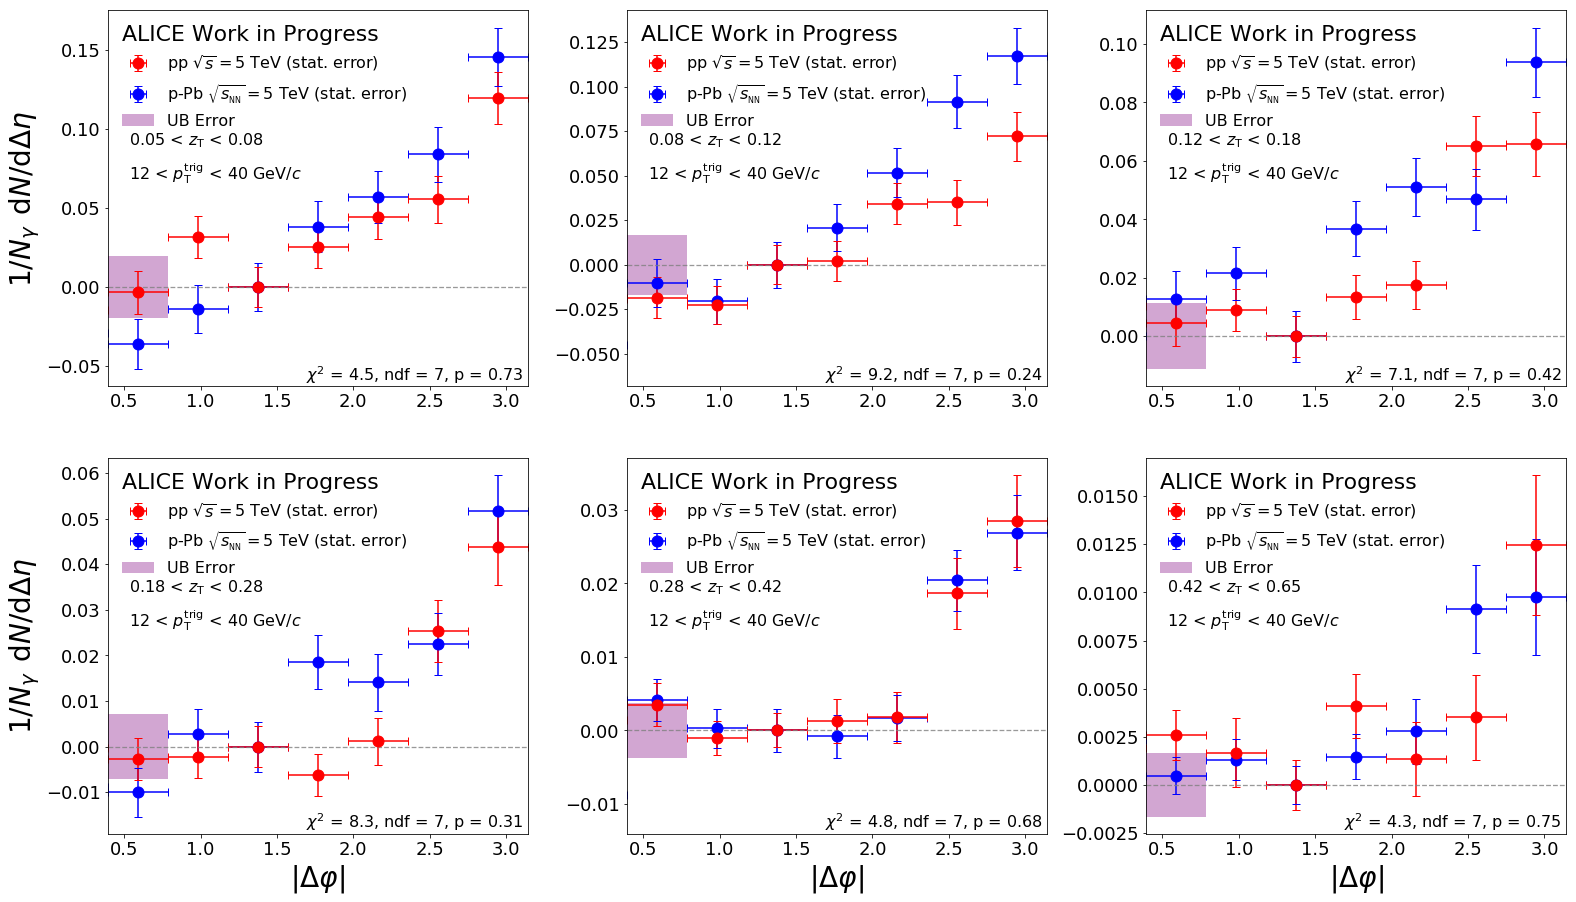

In [138]:
Show_Plots = True

Correlated_Subtraction_Weights(Corrs)
#print("-------------- After Correlated Subtraction -----------")
#print_from_Dict(Corrs)

#if (Show_Plots):
#    Plot_UB_Subtraction(Corrs)

Ped_Sub_After_Cs(Corrs)
#print("-------------- After Pedestal Subtraction -----------")
#print_from_Dict(Corrs)

if (Show_Plots):
    Plot_pp_pPb_Cs(Corrs)

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [9]:
Frags = Get_Fragmentation(Corrs)
print_from_Dict(Frags)

p-Pb_FF_Errors:
2.1128, 1.1636, 0.5380, 0.2223, 0.0820, 0.0259, 0.0073, 

p-Pb_FF:
12.3997, 7.0870, 3.8554, 1.1673, 0.3248, 0.1060, 0.0125, 

p-Pb_purity_FF_Errors:
3.1888, 1.8225, 0.9915, 0.3002, 0.0835, 0.0273, 0.0032, 



## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [10]:
Combined_Frags = Average_FF(Frags)
print(Combined_Frags["p-Pb_Combined_FF"])

[12.39969487  7.08700247  3.85538667  1.16734925  0.32482713  0.10597636
  0.01250257]


5.15198383832534


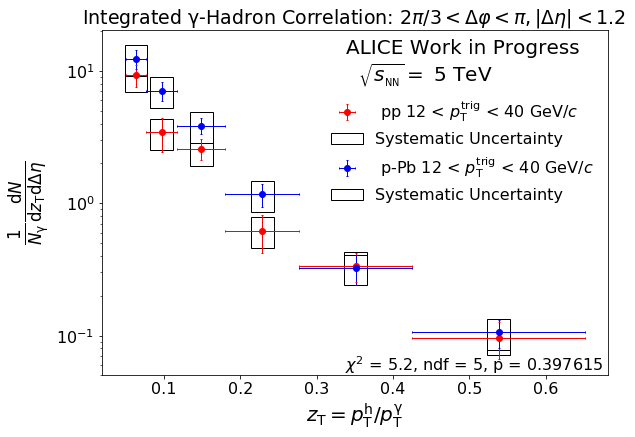

In [11]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

In [108]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [111]:
A = scipy.integrate.quad(lambda x: np.power(x, -2.64), 0.05, 0.65)[0]
print(A)


81.7196449449


('pp', 2.6384040681573793, 8400.263201805097, 16.457083578933663)


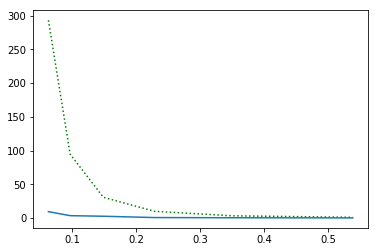

In [109]:
Fit_FF_PowerLaw(Combined_Frags)

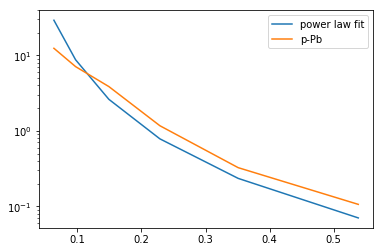

In [130]:
def PwrLaw(x,p,norm):
    return norm*np.power(x, -p)

plt.plot(zT_centers[:NzT-ZT_OFF_PLOT],PwrLaw(zT_centers[:NzT-ZT_OFF_PLOT],2.818587157331669,1/81.7196449449),label="power law fit")
plt.plot(zT_centers[:NzT-ZT_OFF_PLOT],Combined_Frags["p-Pb_Combined_FF"][:NzT-ZT_OFF_PLOT],label = "p-Pb")
plt.yscale('log')
plt.legend()

[ 0.44023175  0.3654068   0.3016834   0.25744169  0.24354091  0.26480319
  0.31416856  0.38086171  0.4573642   0.53951921  0.62510203  0.71287918
  0.8021306   0.89241407  0.9834454   1.07503463  1.1670504   1.25939923
  1.35201288  0.44023175]


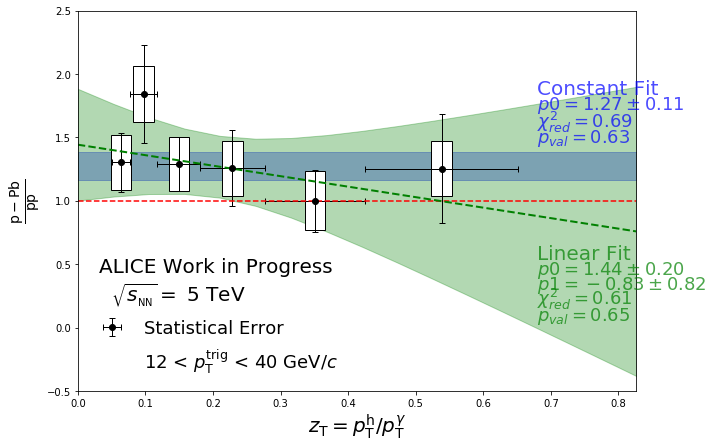

                Central Values:
[ 1.84323594  1.29169056  1.25743005  1.00240396  1.25183081  1.05701169]

                Ratio Uncertainty from Purity:
[ 0.17554529  0.19513649  0.19714574  0.21795182  0.19748784  0.21241001]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.13033646  0.09133632  0.08891373  0.07088066  0.08851781  0.07474201]

                Full Systematic Uncertainty:
[ 0.21864067  0.21545434  0.21626857  0.22918784  0.21641823  0.22517633]

****************************************
Minimizer is Linear
Chi2                      =      3.46474
NDf                       =            5
p0                        =      1.27319   +/-   0.111856    

****************************************
Minimizer is Linear
Chi2                      =      2.45553
NDf                       =            4
p0                        =      1.44262   +/-   0.202372    
p1                        =    -0.827129   +/-   0.823346    


In [42]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

In [13]:
reload(functions_correlations)
from functions_correlations import *

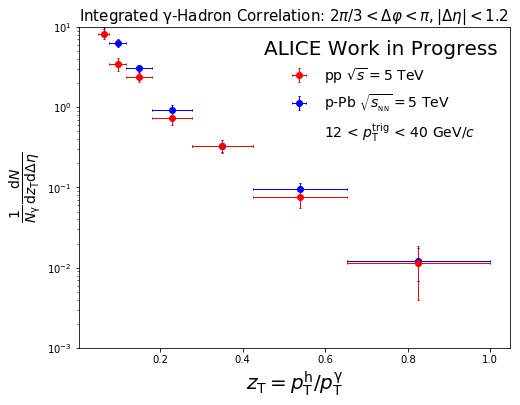

In [14]:
Plot_FF(Frags)

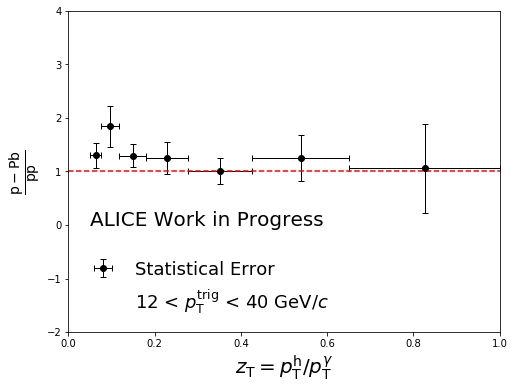

In [15]:
FF_Ratio(Frags)

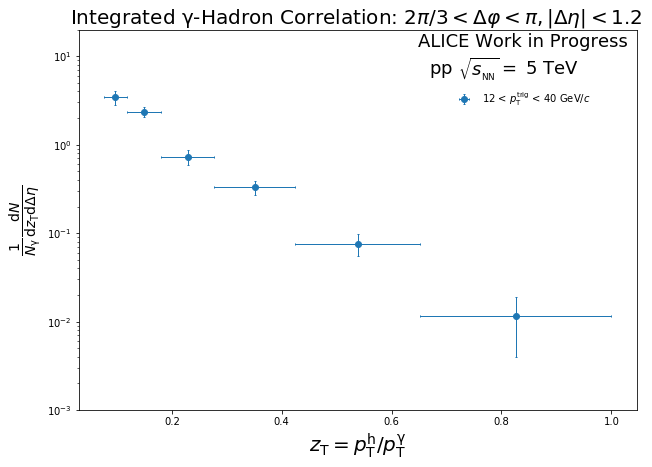

                             PROTON-PROTON:
Central Values
[[ 8.21925078  3.44718497  2.35837024  0.72845753  0.33052268  0.07626868
   0.01142809]]
Statistical Errors (Relative)
[[ 0.13370868  0.17551744  0.12611254  0.1826963   0.18314597  0.28106522
   0.65510514]]
Relative Uncertainty from Purity
[[ 1.26823137  0.53190105  0.36389681  0.11240108  0.05099969  0.01176827
   0.00176336]]




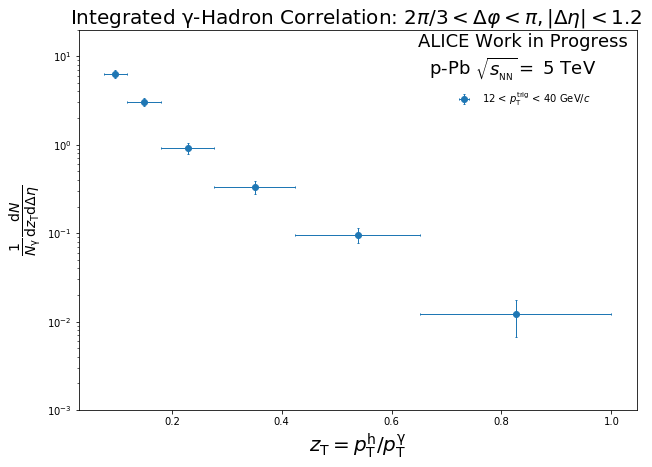

                              PROTON-LEAD:
Central Values
[[ 10.70882314   6.35397523   3.04628458   0.91598439   0.33131725
    0.09547548   0.01207963]]
Statistical Errors (Relative)
[[ 0.12007927  0.11162076  0.10923239  0.15139702  0.16127218  0.19765287
   0.44107191]]
Relative Uncertainty from Purity
[[ 1.65237268  0.98041913  0.47004207  0.1413365   0.05112229  0.01473188
   0.00186389]]




In [16]:
Overlay_pT_FF(Frags)

## Compare Purity Deviations

In [52]:
reload(functions_fragmentation)
from functions_fragmentation import *

pT_Rebin_1_pDevNONE
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
pT_Rebin_1_pDevPlus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
pT_Rebin_1_pDevMinus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy


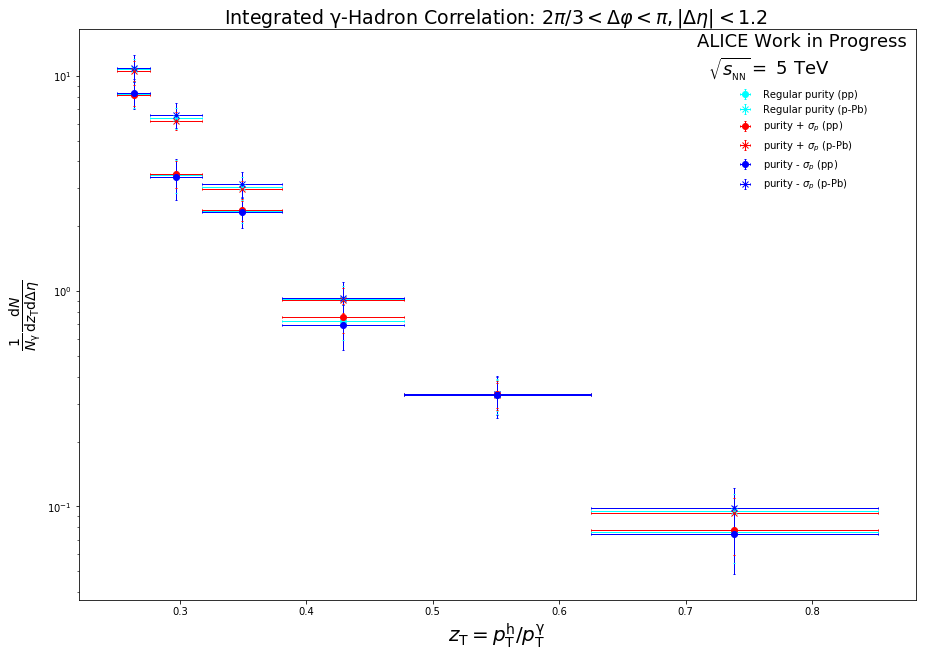

                Central Values:


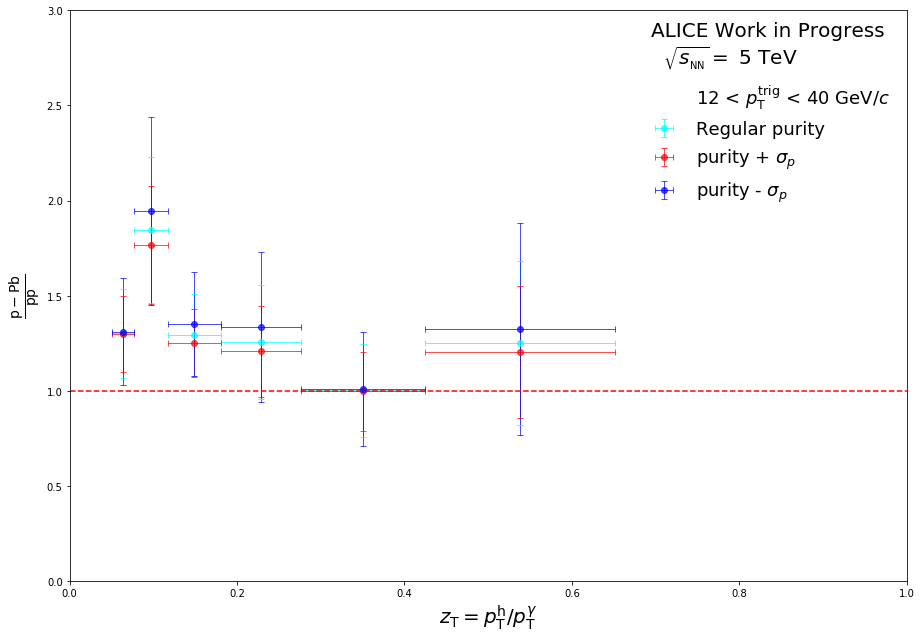

                Central Values:
[ 1.94538076  1.35114274  1.33431154  1.00725471  1.32387001  0.96425839]
[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]

****************************************
Minimizer is Linear
Chi2                      =      3.50422
NDf                       =            5
p0                        =       1.2597   +/-   0.125868    

****************************************
Minimizer is Linear
Chi2                      =      4.30953
NDf                       =            5
p0                        =      1.23001   +/-   0.103787    

****************************************
Minimizer is Linear
Chi2                      =      2.84645
NDf                       =            5
p0                        =       1.2986   +/-   0.15891     


In [53]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus"]
string_descriptions = ["Regular purity", "purity + $\sigma_p$","purity - $\sigma_p$"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_lists(strings, string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)
print(zT_centers)

## Compare Trigger pT Cuts

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


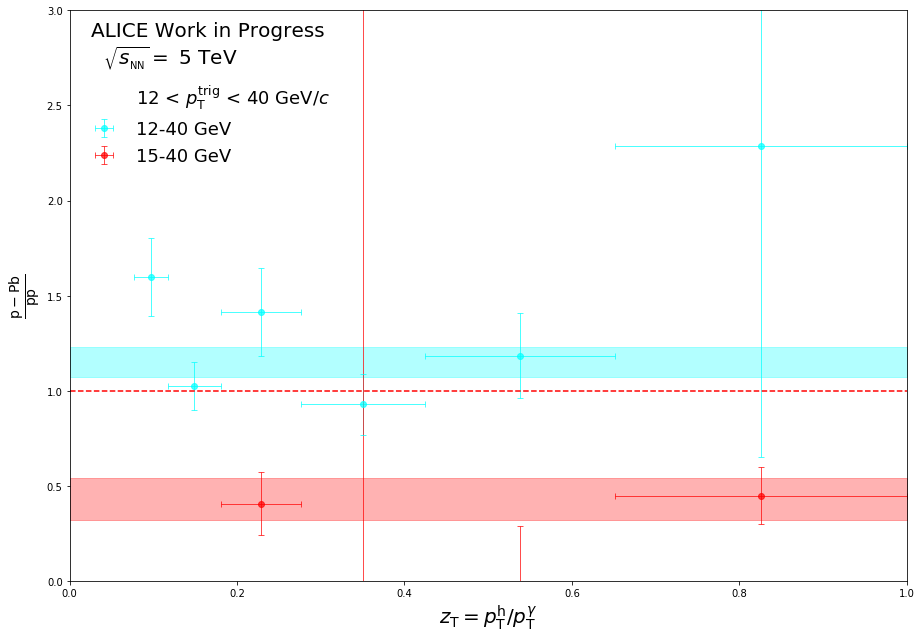

                Central Values:
[-1.61305282 -0.68465468  0.40750914 -0.76863004 -0.03656446  0.44928937]

****************************************
Minimizer is Linear
Chi2                      =      9.42772
NDf                       =            5
p0                        =      1.15188   +/-   0.077927    

****************************************
Minimizer is Linear
Chi2                      =     0.034672
NDf                       =            1
p0                        =     0.430282   +/-   0.111733    


In [19]:
strings = ["pT_Rebin_4","pT_Rebin_4_Cut"]
string_descriptions = ["12-40 GeV", "15-40 GeV"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare Track Cuts

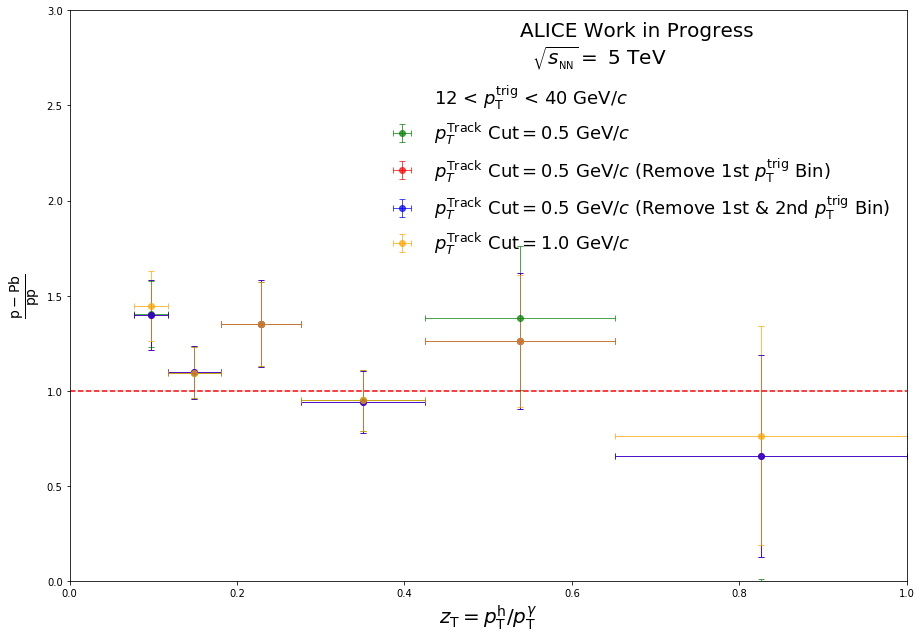

                Central Values:
[ 1.4481745   1.09574319  1.3500227   0.94988511  1.26222862  0.76439433]

****************************************
Minimizer is Linear
Chi2                      =      4.98682
NDf                       =            4
p0                        =      1.17005   +/-   0.0799277   

****************************************
Minimizer is Linear
Chi2                      =       5.4518
NDf                       =            5
p0                        =      1.14786   +/-   0.0813056   

****************************************
Minimizer is Linear
Chi2                      =       5.4518
NDf                       =            5
p0                        =      1.14786   +/-   0.0813056   

****************************************
Minimizer is Linear
Chi2                      =      5.72012
NDf                       =            5
p0                        =      1.16145   +/-   0.0796707   


In [20]:
strings = ["05zT","05zT_3bins","05zT_2bins","1zT"]
string_descriptions = ["$p_{T}^\mathrm{Track}\ \mathrm{Cut} = 0.5\ \mathrm{GeV}/c$",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st & 2nd $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 1.0\ \mathrm{GeV}/c$"]
colors = ["green","red","blue","orange"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

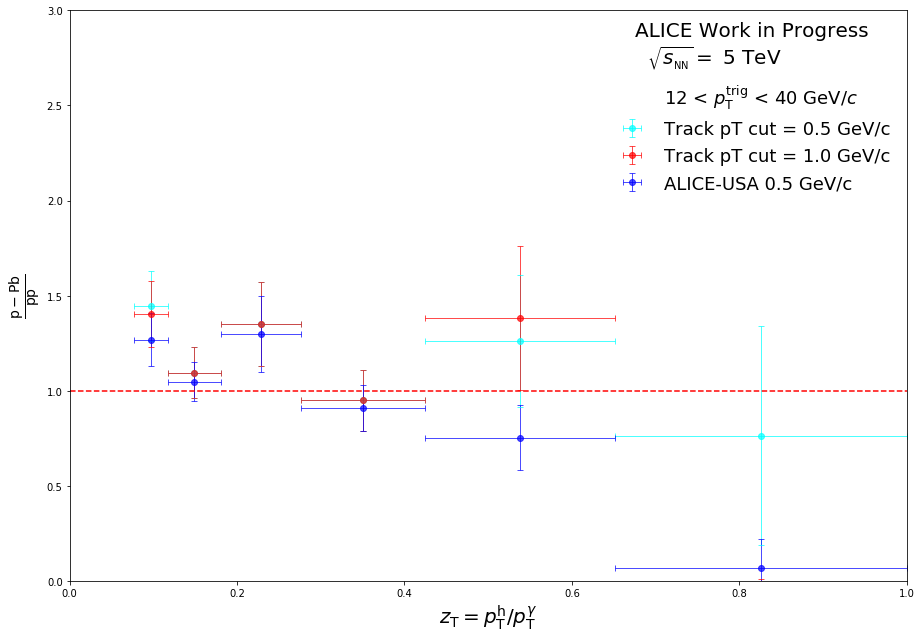

                Central Values:
[ 1.26981434  1.04878313  1.29933689  0.91089677  0.75447711  0.07122347]

****************************************
Minimizer is Linear
Chi2                      =      5.72012
NDf                       =            5
p0                        =      1.16145   +/-   0.0796707   

****************************************
Minimizer is Linear
Chi2                      =      4.98682
NDf                       =            4
p0                        =      1.17005   +/-   0.0799277   

****************************************
Minimizer is Linear
Chi2                      =      43.7378
NDf                       =            5
p0                        =     0.909221   +/-   0.0561982   


In [21]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","ALICE-USA 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

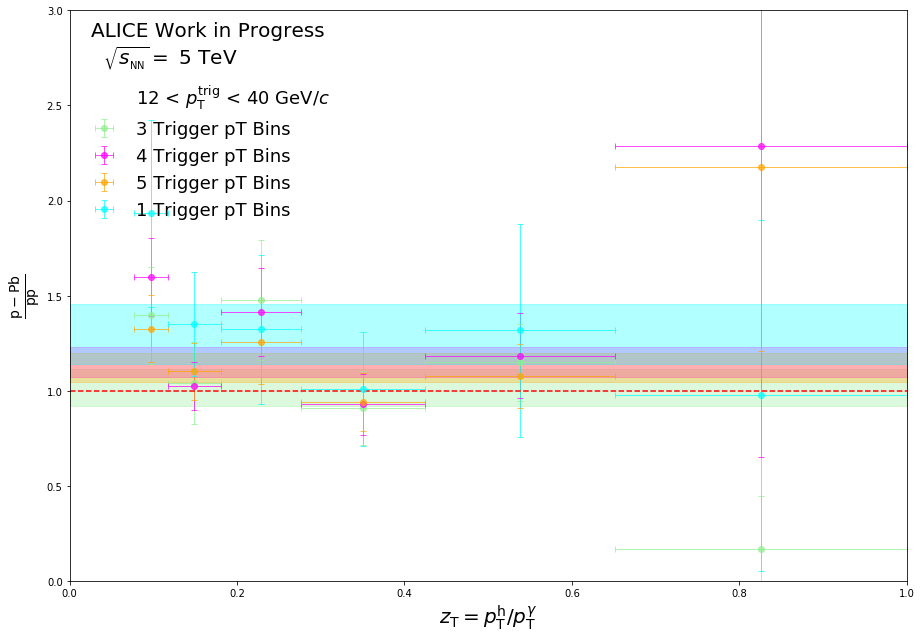

                Central Values:
[ 1.93415883  1.35304985  1.32425776  1.00967556  1.31898697  0.97595493]

****************************************
Minimizer is Linear
Chi2                      =      14.5031
NDf                       =            5
p0                        =       1.0177   +/-   0.0950551   

****************************************
Minimizer is Linear
Chi2                      =      9.42772
NDf                       =            5
p0                        =      1.15188   +/-   0.077927    

****************************************
Minimizer is Linear
Chi2                      =      4.39025
NDf                       =            5
p0                        =      1.12323   +/-   0.0753807   

****************************************
Minimizer is Linear
Chi2                      =      2.75693
NDf                       =            5
p0                        =      1.29967   +/-   0.159201    


In [22]:
strings = ["pT_Rebin_3","pT_Rebin_4","pT_Rebin_5","pT_Rebin_1"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins","1 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange","cyan"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

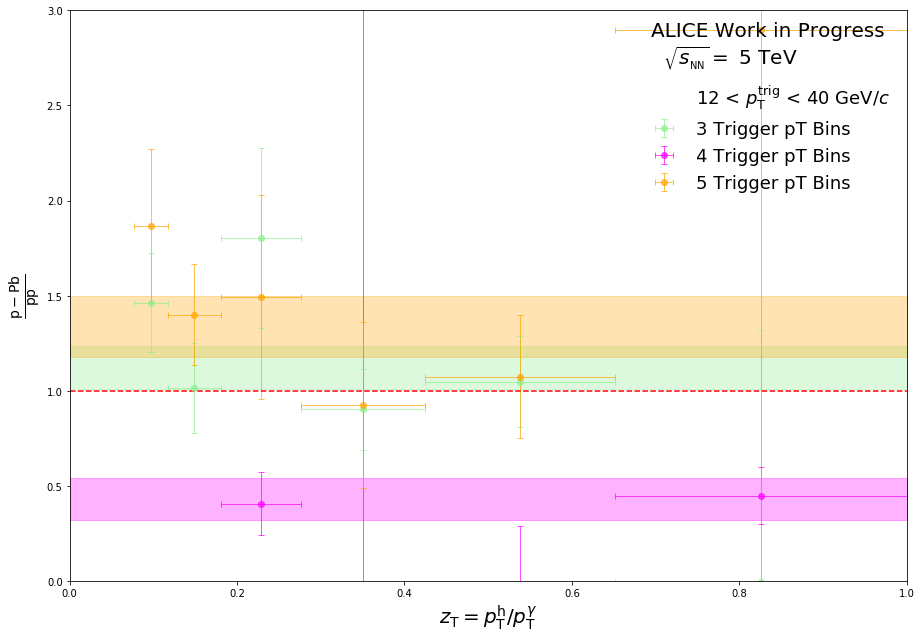

                Central Values:
[ 1.86557271  1.40054509  1.49282524  0.92696167  1.07433435  2.89808321]

****************************************
Minimizer is Linear
Chi2                      =      5.20283
NDf                       =            4
p0                        =      1.12393   +/-   0.114259    

****************************************
Minimizer is Linear
Chi2                      =     0.034672
NDf                       =            1
p0                        =     0.430282   +/-   0.111733    

****************************************
Minimizer is Linear
Chi2                      =      3.51774
NDf                       =            5
p0                        =       1.3394   +/-   0.160769    


In [23]:
strings = ["pT_Rebin_3_Cut","pT_Rebin_4_Cut","pT_Rebin_5_Cut"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare ZT Binning (6,7, & 8)

In [24]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


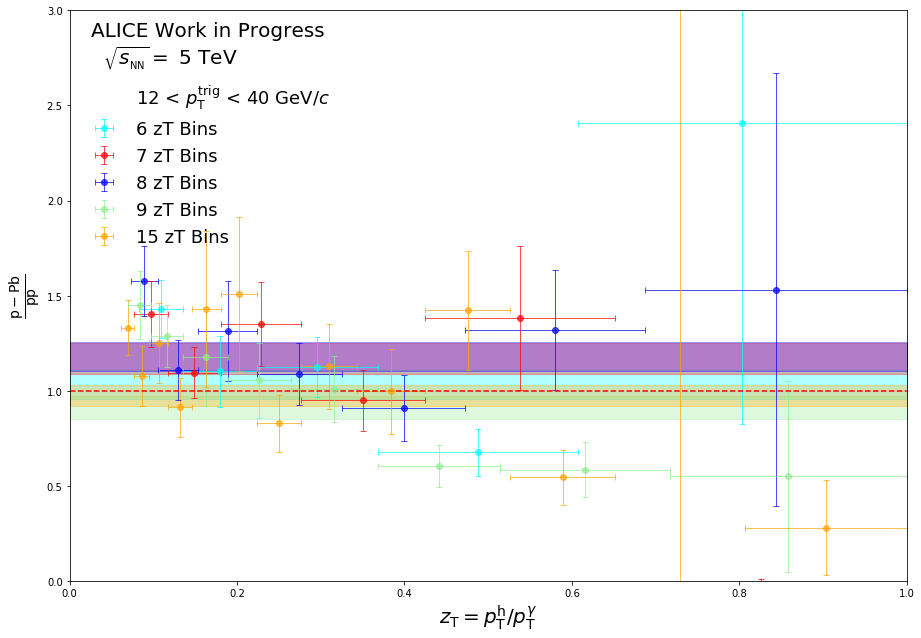

                Central Values:
[ 1.33279792  1.07594827  1.25077422  0.91343145  1.42914142  1.50908939
  0.82971572  1.12926386  0.9983693   1.42230144  0.54562724  8.00428232
  0.28118115]

****************************************
Minimizer is Linear
Chi2                      =      16.2139
NDf                       =            4
p0                        =      1.03298   +/-   0.0749667   

****************************************
Minimizer is Linear
Chi2                      =      4.98682
NDf                       =            4
p0                        =      1.17005   +/-   0.0799277   

****************************************
Minimizer is Linear
Chi2                      =       8.1194
NDf                       =            6
p0                        =      1.17961   +/-   0.0777431   

****************************************
Minimizer is Linear
Chi2                      =      29.4594
NDf                       =            7
p0                        =     0.910552   +/-

In [25]:
strings = ["zT_Rebin_6","05zT","zT_Rebin_8","zT_Rebin_9","zT_Rebin_15"]
string_descriptions = ["6 zT Bins", "7 zT Bins", "8 zT Bins","9 zT Bins","15 zT Bins"]
colors = ["cyan","red","blue","lightgreen","orange"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


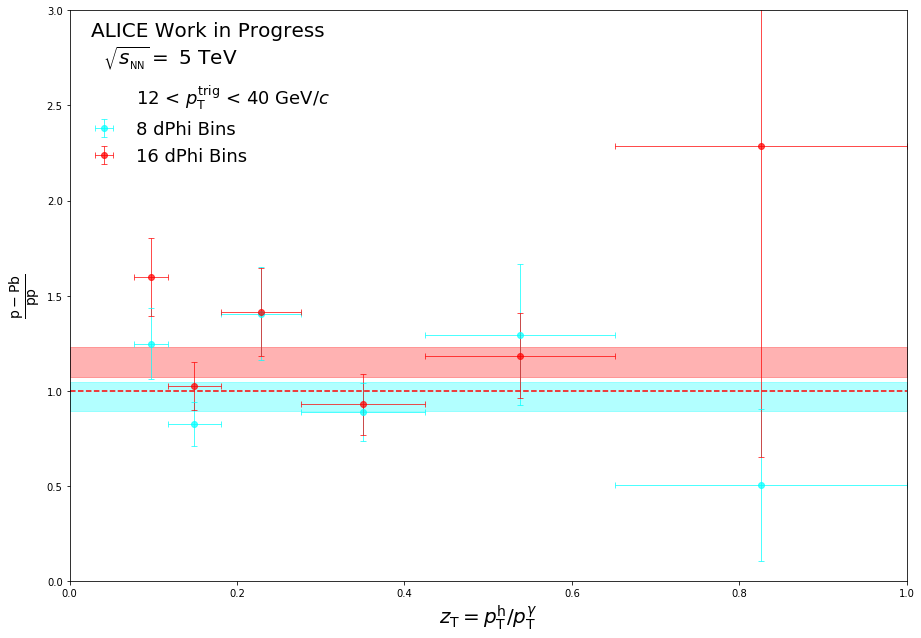

                Central Values:
[ 1.59959705  1.02588182  1.41358717  0.92988733  1.18494622  2.28851581]

****************************************
Minimizer is Linear
Chi2                      =      9.42362
NDf                       =            5
p0                        =     0.969949   +/-   0.0744521   

****************************************
Minimizer is Linear
Chi2                      =      9.42772
NDf                       =            5
p0                        =      1.15188   +/-   0.077927    


In [26]:
strings = ["dPhi_Rebin_16","pT_Rebin_4"]
string_descriptions = ["8 dPhi Bins", "16 dPhi Bins"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


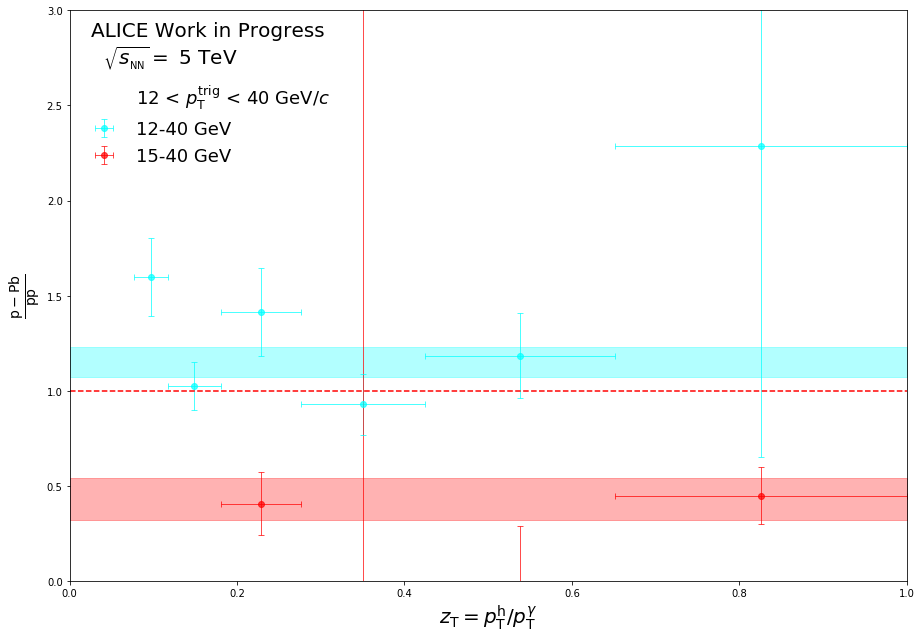

                Central Values:
[-1.61305282 -0.68465468  0.40750914 -0.76863004 -0.03656446  0.44928937]

****************************************
Minimizer is Linear
Chi2                      =      9.42772
NDf                       =            5
p0                        =      1.15188   +/-   0.077927    

****************************************
Minimizer is Linear
Chi2                      =     0.034672
NDf                       =            1
p0                        =     0.430282   +/-   0.111733    


In [27]:
strings = ["pT_Rebin_4","pT_Rebin_4_Cut"]
string_descriptions = ["12-40 GeV", "15-40 GeV"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


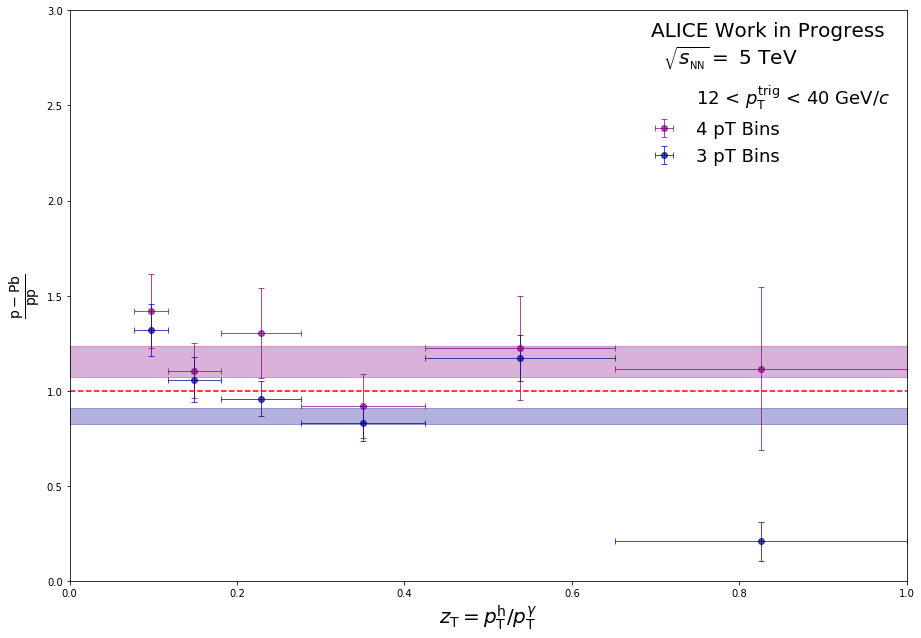

                Central Values:
[ 1.31934069  1.05935782  0.95893096  0.8298763   1.17231065  0.20835547]

****************************************
Minimizer is Linear
Chi2                      =      4.29152
NDf                       =            5
p0                        =      1.15442   +/-   0.0831908   

****************************************
Minimizer is Linear
Chi2                      =       64.091
NDf                       =            5
p0                        =       0.8671   +/-   0.0435484   


In [28]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights"]
string_descriptions = ["4 pT Bins", "3 pT Bins"]
colors = ["purple","darkblue"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


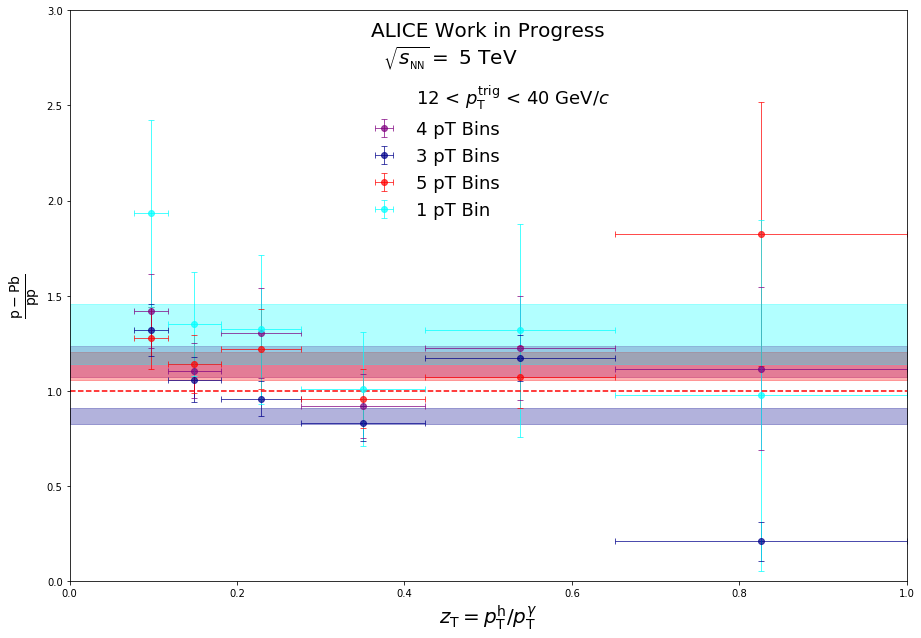

                Central Values:
[ 1.93415883  1.35304985  1.32425776  1.00967556  1.31898697  0.97595493]

****************************************
Minimizer is Linear
Chi2                      =      4.29152
NDf                       =            5
p0                        =      1.15442   +/-   0.0831908   

****************************************
Minimizer is Linear
Chi2                      =       64.091
NDf                       =            5
p0                        =       0.8671   +/-   0.0435484   

****************************************
Minimizer is Linear
Chi2                      =       3.3319
NDf                       =            5
p0                        =      1.13134   +/-   0.0738275   

****************************************
Minimizer is Linear
Chi2                      =      2.75693
NDf                       =            5
p0                        =      1.29967   +/-   0.159201    


In [29]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights","pT_Rebin_5_Weights","pT_Rebin_1"]
string_descriptions = ["4 pT Bins", "3 pT Bins","5 pT Bins","1 pT Bin"]
colors = ["purple","darkblue","red","cyan"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


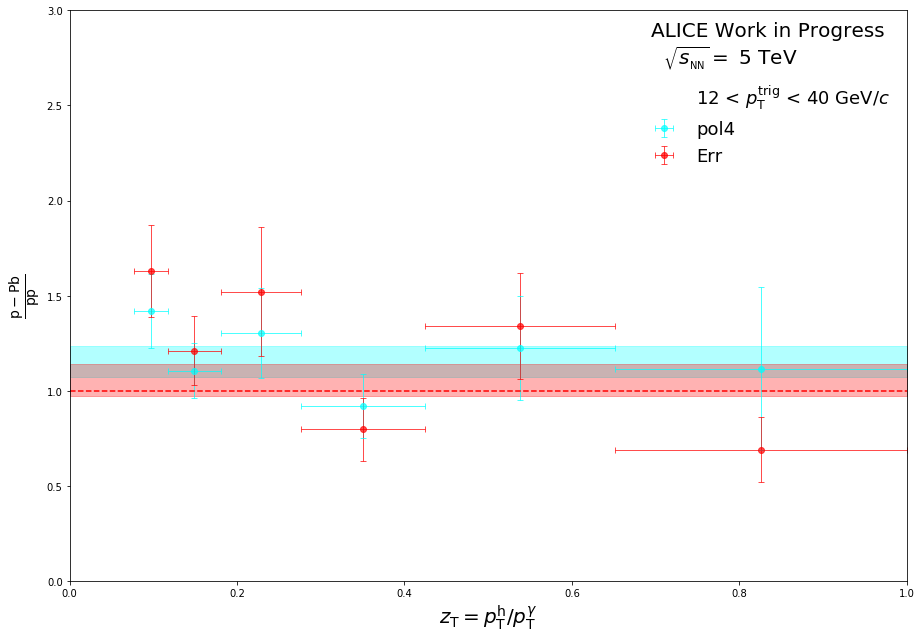

                Central Values:
[ 1.62998508  1.2101335   1.52003152  0.79741997  1.33920484  0.69125875]

****************************************
Minimizer is Linear
Chi2                      =      4.29152
NDf                       =            5
p0                        =      1.15442   +/-   0.0831908   

****************************************
Minimizer is Linear
Chi2                      =      16.3634
NDf                       =            5
p0                        =      1.05627   +/-   0.0843048   


In [30]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_4_ErrWeights"]
string_descriptions = ["pol4", "Err"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


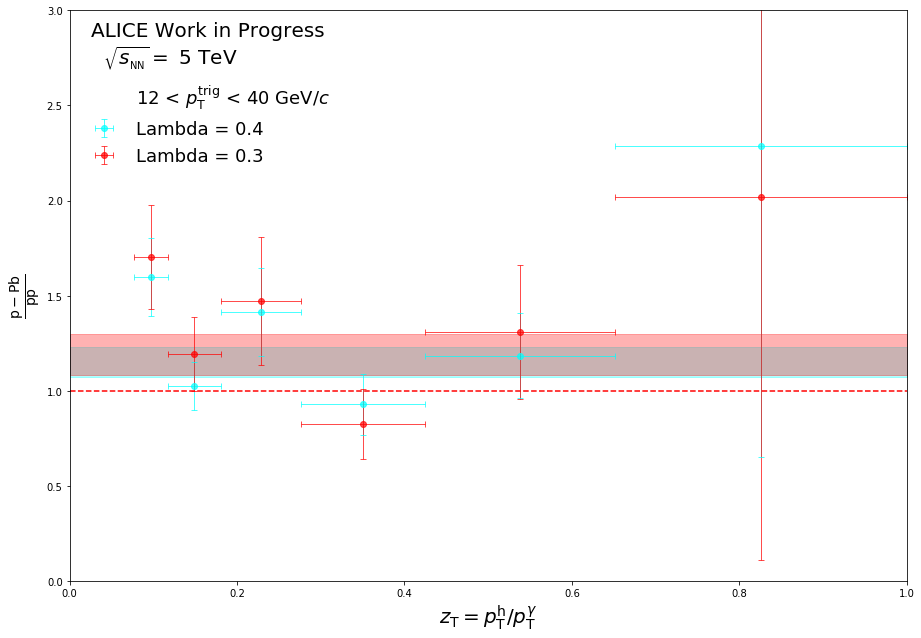

                Central Values:
[ 1.70222614  1.19527022  1.4729536   0.82636153  1.31005331  2.01777407]

****************************************
Minimizer is Linear
Chi2                      =      9.42772
NDf                       =            5
p0                        =      1.15188   +/-   0.077927    

****************************************
Minimizer is Linear
Chi2                      =      8.39933
NDf                       =            5
p0                        =      1.19062   +/-   0.107626    


In [31]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


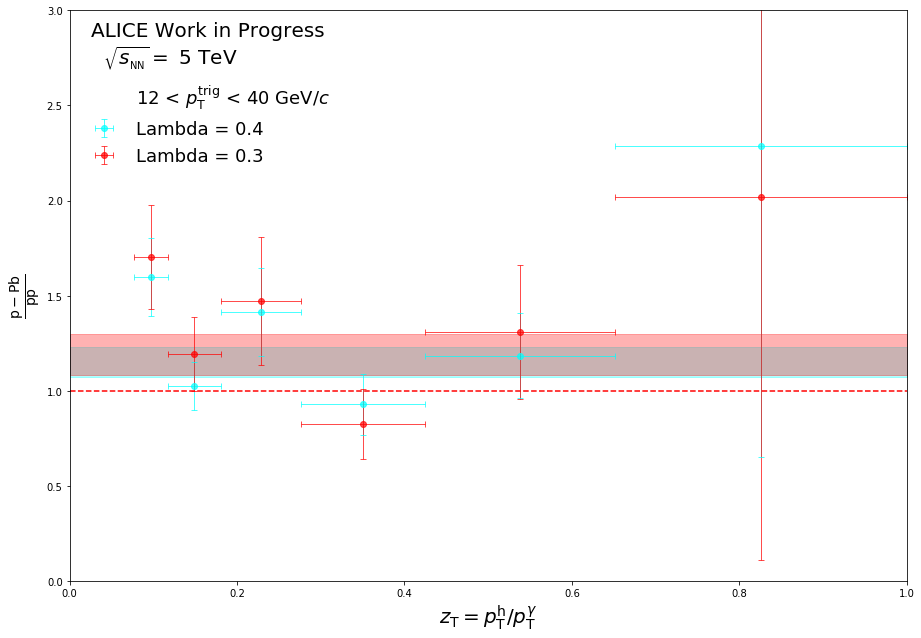

                Central Values:
[ 1.70222614  1.19527022  1.4729536   0.82636153  1.31005331  2.01777407]

****************************************
Minimizer is Linear
Chi2                      =      9.42772
NDf                       =            5
p0                        =      1.15188   +/-   0.077927    

****************************************
Minimizer is Linear
Chi2                      =      8.39933
NDf                       =            5
p0                        =      1.19062   +/-   0.107626    


In [32]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [33]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

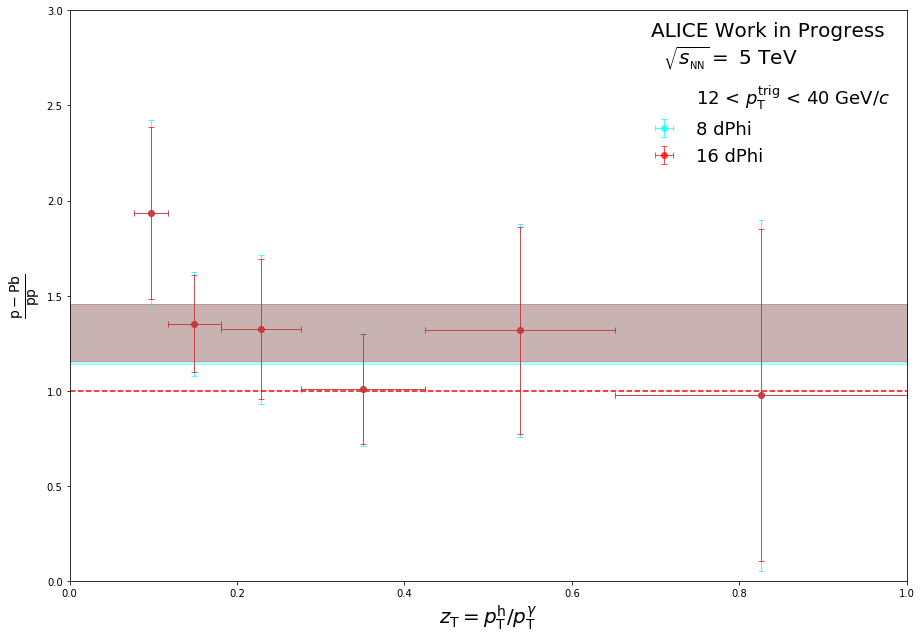

                Central Values:
[ 1.93415883  1.35304985  1.32425776  1.00967556  1.31898697  0.97595493]

****************************************
Minimizer is Linear
Chi2                      =      2.75693
NDf                       =            5
p0                        =      1.29967   +/-   0.159201    

****************************************
Minimizer is Linear
Chi2                      =      3.15467
NDf                       =            5
p0                        =      1.30624   +/-   0.150476    


In [34]:
strings = ["pT_Rebin_1","pT_Rebin_1_16dPhi"]
string_descriptions = ["8 dPhi", "16 dPhi"]
colors = ["cyan","red"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


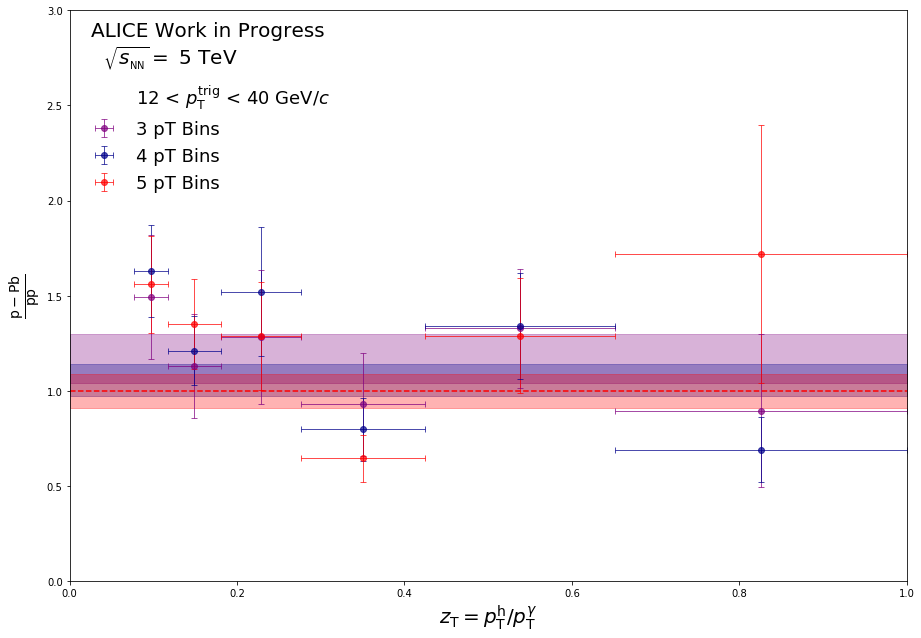

                Central Values:
[ 1.56044441  1.34968643  1.28675624  0.64593203  1.28956529  1.71962152]

****************************************
Minimizer is Linear
Chi2                      =      2.61333
NDf                       =            5
p0                        =      1.17129   +/-   0.12845     

****************************************
Minimizer is Linear
Chi2                      =      16.3634
NDf                       =            5
p0                        =      1.05627   +/-   0.0843048   

****************************************
Minimizer is Linear
Chi2                      =      18.3916
NDf                       =            5
p0                        =     0.997835   +/-   0.089452    


In [35]:
strings = ["pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights","pT_Rebin_5_ErrWeights"]
string_descriptions = ["3 pT Bins", "4 pT Bins","5 pT Bins"]
colors = ["purple","darkblue","red",]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [36]:
print(pTbins)

[12.0, 40.0]
